# Getting started

It is assumed that you have read
[start](start.ipynb)
and followed the installation instructions there.

# Corpus

This is:

* `dss` Dead Sea Scrolls

# First acquaintance

We just want to grasp what the corpus is about and how we can find our way in the data.

Open a terminal or command prompt and say one of the following

```text-fabric dss```

Wait and see a lot happening before your browser starts up and shows you an interface on the corpus:

Text-Fabric needs an app to deal with the corpus-specific things.
It downloads/finds/caches the latest version of the **app**:

```
Using TF-app in /Users/dirk/text-fabric-data/annotation/app-dss/code:
	rv0.6=#304d66fd7eab50bbe4de8505c24d8b3eca30b1f1 (latest release)
```

It downloads/finds/caches the latest version of the **data**:

```
Using data in /Users/dirk/text-fabric-data/etcbc/dss/tf/0.6:
	rv0.6=#9b52e40a8a36391b60807357fa94343c510bdee0 (latest release)
```

The data is preprocessed in order to speed up typical Text-Fabric operations.
The result is cached on your computer.
Preprocessing costs time. Next time you use this corpus on this machine, the startup time is much quicker.

```
TF setup done.
```

Then the app goes on to act as a local webserver serving the corpus that has just been downloaded
and it will open your browser for you and load the corpus page

```
 * Running on http://localhost:8107/ (Press CTRL+C to quit)
Opening dss in browser
Listening at port 18987
```

<img src="images/dss-bare.png" width="600">

# Help!

Indeed, that is what you need. Click the vertical `Help` tab.

From there, click around a little bit. Don't read closely, just note the kinds of information that is presented to you.

Later on, it will make more sense!

# Browsing

First we browse our data. Click the browse button.

<img src="images/dss-browse.png" width="800">

and then, in the table of *documents* (scrolls), click on a fragment of scroll `1QSb`: 

<img src="images/dss-documents.png" width="200">


Now you're looking at a fragment of a scroll: the writing in Hebrew characters without vowel signs.

<img src="images/dss-fragment.png" width="800">

Now click the *Options* tab and select the `layout-orig-unicode` format to see the same fragment in a layout that indicates the status
of the pieces of writing.

<img src="images/dss-layout.png" width="1000">

You can click a triangle to see how a line is broken down:

<img src="images/dss-drill.png" width="800">

# Searching

In this corpus there is a lot of attention for the uncertainty of signs and whether they have been corrected, either in antiquity or
in more modern times.

Also, the corpus is marked up with part-of-speech for each word.

So we can, for example, search for *verbs* that have an uncertain or corrected or removed consonant in them.

```
word sp=verb
  sign type=cons
  /with/
  .. unc=1|2|3|4
  /or/
  .. cor=1|2|3
  /or/
  .. rem=1|2
  /or/
  .. rec=1
  /-/
```

<img src="images/dss-search.png" width="1200">

In English:

search all `word`s that contain a `sign` with feature `type`
having value `cons` (consonant) where at least one of the following holds for
that sign:

* the feature `unc` has value `1` or `2` or `3`  or `4`
* the feature `cor` has value `1` or `2` or `3`
* the feature `rem` has value `1` or `2`
* the feature `rec` has value `1`


Words with multiple uncertain signs correspond with multiple results. We can condense the results in such a way that all results for the same word are shown as one result.

Click the options tab, check *condense results*, and check *word* as the container into you want to condense.

<img src="images/dss-search2.png" width="1200">

You can expand results by clicking the triangle. 

You can see the result in context by  clicking the browse icon.

You can go back to the result list by clicking the results icon.

<img src="images/dss-back.png" width="1000">

# Computing

This triggers other questions.

For example: how many verbs are there, if there are already 37344 with uncertain signs?

How is uncertainty distributed over the verbs?
I.e. how many verbs have how many uncertain/corrected/removed signs?

*This is a typical question where you want to leave the search mode and enter computing mode*.

Let's find out.

Extra information:

* the features `unc`, `cor`, `rem` have values 1, 2, 3, 4 that indicate the kind of uncertainty, correction, removal.
  We just use those values as the seriousness of the uncertainty.
  Essentially, we just sum up all values of these features for each sign.
* the feature `rec` means, if that the sign is reconstructed. We consider it to be severely uncertain, and add the penalty 10 for
  such signs.

Open your terminal and say

``` sh
jupyter notebook
```

Your browser starts up and presents you a local computing environment where you can run Python programs.

You see cells like the one below, where you can type programming statements and execute them by pressing `Shift Enter`.

First we load the Text-Fabric module, as follows:

In [1]:
from tf.app import use

Now we load the TF-app for the corpus `dss` and that app loads the corpus data.

We give a name to the result of all that loading: `A`.

In [3]:
A = use('ETCBC/dss', hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


Some bits are familiar from above, when you ran the `text-fabric` command in the terminal.

Other bits are links to the documentation, they point to the same places as the links on the Text-Fabric browser.

You see a list of all the data features that have been loaded.

And a list of references to the API documentation, which tells you how you can use this data in your program statements.

# Searching (revisited)

We do the same search again, but now inside our program.

That means that we can capture the results in a list for further processing. 

In [4]:
template = '''
word sp=verb
  sign type=cons
  /with/
  .. unc=1|2|3|4
  /or/
  .. cor=1|2|3
  /or/
  .. rem=1|2
  /or/
  .. rec=1
  /-/
'''
results = A.search(template)

  1.70s 125111 results


In a few seconds, we have all the results!

Let's look at the first one:

In [5]:
results[0]

(1607456, 1742)

Each result is a list of numbers: for a 

1. word
1. sign

Here is the  second one:

In [6]:
results[1]

(1607456, 1743)

And here the last one:

In [7]:
results[-1]

(2107836, 1430165)

Now we are only interested in the words that we have encountered.
We collect them in a set:

In [8]:
verbs = sorted({result[0] for result in results})
len(verbs)

37344

This corresponds exactly to the number of condensed results!

Now we get the number of verbs:

In [9]:
len(F.sp.s('verb'))

58873

In English: take feature `sp` (part-of-speech), and collect all nodes that have value `verb` for this feature.
Then take the length of this list.

Now we want to find out something for each result verb: what is the accumulated uncertainty of that verb?
Some verbs have more consonants than others, so we divide by the number of consonants.

We define a function that collects the uncertainty of a single sign:

In [10]:
def getUncertainty(sign):
  return sum((
    F.unc.v(sign) or 0,
    F.cor.v(sign) or 0,
    F.rem.v(sign) or 0,
    10 if F.rec.v(sign) else 0
  ))

Let's see what this gives for the first sign in the 1000th result:

In [11]:
sign = results[999][1]
A.pretty(sign)

In [12]:
unc  =  getUncertainty(sign)
print(unc)

10


An other one:

In [13]:
sign = results[12][1]
A.pretty(sign)
print(getUncertainty(sign))

4


Now we define a function that gives us the uncertainty of a word.
We collect the consonants of the word.
We sum the uncertainty of them and divide it by the number of consonants in the word.

In [14]:
def uncertainty(word):
  signs = L.d(word, otype='sign')  # go a Level down to signs and collect them in a list
  return sum(getUncertainty(sign) for sign in signs) / len(signs)

We compute the uncertainty of some verbs.

In [15]:
verb = verbs[999]
A.pretty(verb)

Now the computation:

In [16]:
unc  =  uncertainty(verb)
print(unc)

4.0


An other one:

In [17]:
verb = verbs[12]
A.pretty(verb)
print(uncertainty(verb))

1.25


We compute all word uncertainties and store them in a dictionary:

In [18]:
verbUncertainty = {verb: uncertainty(verb) for verb in verbs}
len(verbUncertainty)

37344

What is the minimum and the maximum uncertainty?

In [19]:
max(verbUncertainty.values())

14.0

In [20]:
min(verbUncertainty.values())

0.14285714285714285

In order to visualize how many how uncertain verbs there are, we make a scatterplot,
using the *seaborn* library.

(You might need to install the python package `seaborn`)

In [21]:
!pip install seaborn

In [22]:
import seaborn as sns

/var/folders/nb/_qgnfkns75bcn_p_msyjl81m0000gn/T/ipykernel_55730/2177275149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(verbUncertainty.values()), axlabel="uncertainty")


<Axes: xlabel='uncertainty', ylabel='Density'>

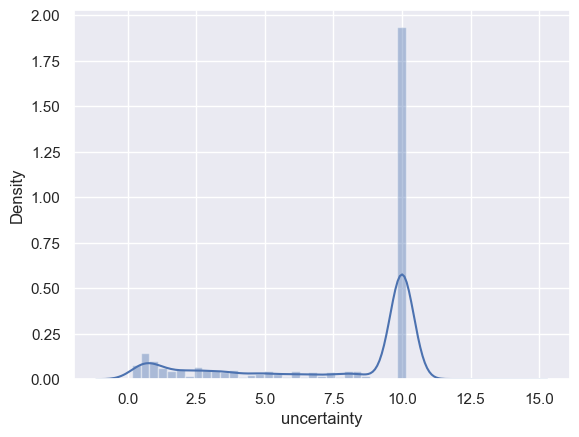

In [23]:
sns.set(color_codes=True)
sns.distplot(list(verbUncertainty.values()), axlabel="uncertainty")

Let's single out the verbs with uncertainty greater than 9, but lower than 10, and inspect a few.

In [24]:
verbHighUnc = [verb for (verb, unc) in verbUncertainty.items() if 9 < unc < 10]
len(verbHighUnc)

10

In [25]:
A.show([[verb] for verb in verbHighUnc], fmt='layout-orig-full', condenseType='word')